Question 1: implement the CircularQueue class and write a function reverse_and_enqueue(queue) that takes a CircularQueue object as input, reverses the elements in the queue, and then enqueues them back into the same queue. ?


First we declare a class that contain CircularQueue class that impliments circuler queue methods.


In [1]:
class CircularQueue:
    # parameterized constructor
    def __init__(self, capacity):
        self.capacity = capacity
        self.queue = [None] * capacity
        self.front = self.rear = -1

    def enqueue(self, item):
        if self.is_full():
            print("Queue is full. Enqueue operation not allowed.")
            return False
        elif self.is_empty():
            self.front = self.rear = 0
        else:
            self.rear = (self.rear + 1) % self.capacity

        self.queue[self.rear] = item
        return True

    def dequeue(self):
        if self.is_empty():
            print("Queue is empty. Dequeue operation not allowed.")
            return None
        elif self.front == self.rear:
            item = self.queue[self.front]
            self.front = self.rear = -1
        else:
            item = self.queue[self.front]
            self.front = (self.front + 1) % self.capacity
        return item

    def is_empty(self):
        return self.front == -1

    def is_full(self):
        return (self.rear + 1) % self.capacity == self.front

    def size(self):
        if self.is_empty():
            return 0
        elif self.front <= self.rear:
            return self.rear - self.front + 1
        else:
            return self.capacity - (self.front - self.rear - 1)
        
    def display(self):
        if self.is_empty():
            print("Queue is empty.")
        else:
            i = self.front
            while i != self.rear:
                print(self.queue[i], end=" ")
                i = (i + 1) % self.capacity
            print(self.queue[self.rear])


def reverse_and_enqueue(queue):
    stack = []

    while not queue.is_empty():
        item = queue.dequeue()
        stack.append(item)

    while stack:
        item = stack.pop()
        queue.enqueue(item)

cq = CircularQueue(5)#calling constructor
cq.enqueue(1)
cq.enqueue(2)
cq.enqueue(3)
print(cq.dequeue()) #display ing value of deque 
cq.enqueue(4)
cq.enqueue(5)
cq.enqueue(6)  # This will print a message indicating that the queue is full
print(cq.size()) 

cq.display()
reverse_and_enqueue(cq) #Reverses the elements in the circular queue using a stack.
cq.display()


1
5
2 3 4 5 6
6 5 4 3 2


This code defines a class CircularQueue that implements a circular queue data structure. A circular queue is a variation of a regular queue in which the end of the queue is connected to the beginning, forming a circular structure.

2. Constructor __init__(self, capacity):
   This is the constructor method that initializes a CircularQueue object with the specified capacity. It sets up the initial state of the queue by creating an internal list called queue, initializing front and rear pointers to -1 (indicating an empty queue)

3. Method enqueue(self, item):
   Adds an item to the circular queue.
   Checks if the queue is full and if the queue is empty.
   If the queue is empty, it sets both front and rear to 0.
   If the queue is not empty, it increments rear in a circular manner (using modulo operator).
   Finally, it adds the item to the queue and returns True.

4. Method dequeue(self) :
   this method Removes and returns an item from the front of the circular queue.
   Checks if the queue is empty and handles various cases.If the queue has only one item, it resets both front and rear.
   Otherwise, it increments front in a circular manner.Returns the dequeued item.

5. Method is_empty(self) :
   Checks if the circular queue is empty by looking at the front index.

6. Method is_full(self) :
   Checks if the circular queue is full by checking if the next position after rear is equal to front.

7. Method size(self) :
   Returns the number of elements in the circular queue.
   Handles different scenarios based on whether the queue wraps around or not.

8. Method display(self) :
   Displays the elements of the circular queue from front to rear.

9. Function reverse_and_enqueue(queue) :
   Reverses the elements in the circular queue using a stack.
   Dequeues elements from the queue and pushes them onto the stack.
   Pops elements from the stack and enqueues them back into the queue.

2. You can instruct the candidate to download the CIFAR-10 dataset using the tensorflow library, which provides an inbuilt function to load the dataset ?

In [2]:
import pandas as pd
import tensorflow as tf
import os
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()



This code snippet is an example of how to use TensorFlow to load the CIFAR-10 dataset, a popular dataset commonly used for image classification tasks. The dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class.
first we import Tenserflow then we use this following code snippet

In [3]:
data = pd.DataFrame({
    'image': x_train.tolist(),
    'class': y_train.flatten()
})

This code creates a Pandas DataFrame named 'data' with two columns: 'image' and 'class', where 'image' contains the image data converted to a list using .tolist(), and 'class' contains the class labels flattened using .flatten()

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

image    0
class    0
dtype: int64


Other datasets that might have missing values, you can follow the approach outlined earlier for handling them. However, in the case of CIFAR-10, you can skip the missing value handling step.

class
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64


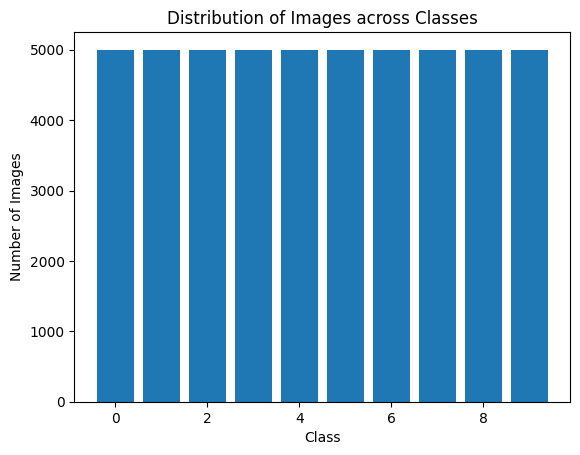

In [5]:
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts().sort_index()
print(class_counts)
plt.bar(class_counts.index, class_counts.values) # type: ignore
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Classes')
plt.show()


This code calculates the counts of each class using the value_counts() function, sorts the counts by index, and then plots a bar chart using Matplotlib